In [11]:
from extremefill2D.fextreme import init_sim, restart_sim, iterate_sim
from extremefill2D.fextreme.plot import vega_plot_treants, vega_plot_treant
import vega
from extremefill2D.fextreme.tools import get_by_uuid

In [12]:
treant = init_sim('scripts/params.json',
                  'data',
                  tags=['debug'],
                  rinner=4e-6,
                  router=8.5e-6,
                  rboundary=28e-6,
                  kPlus=546,
                  kMinus=3.79e7,
                  appliedPotential=-0.45)
                

In [13]:
print(treant.uuid)

641da22d-ab5d-4044-abb6-30819d7a4ae8


In [ ]:
treant = iterate_sim(treant, 3, 100)

In [5]:
treant1 = init_sim('scripts/params.json', 'data', tags=['debug'])
print(treant1.uuid)
treant1 = iterate_sim(treant1, 1, 300)

bbcc6091-fe2d-4eee-95c2-30d1f319479c


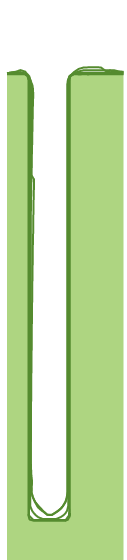

In [8]:
vega_plot_treants([treant, treant1])